# Overview

Expolatory Data Analysis (EDA) を行う。各カラムの型、値の分布、欠損値、外れ値の理解、目的変数と各変数の相関の関係性の把握。

- 変数の平均、標準偏差、最大、最小、分位点
- 値の種類数
- 欠損値の有無
- 相関係数

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# my util functions
import orvp_utils as orvp

In [4]:
book_train = pd.read_parquet("../input/optiver-realized-volatility-prediction/book_train.parquet/stock_id=0")
trade_train = pd.read_parquet("../input/optiver-realized-volatility-prediction/trade_train.parquet/stock_id=0")

# book_train

In [7]:
book_train.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100


In [8]:
print(book_train.shape)

(917553, 10)


In [9]:
for col in book_train.columns:
    print(f"- {col}", book_train[col].unique().shape)

- time_id (3830,)
- seconds_in_bucket (600,)
- bid_price1 (81771,)
- ask_price1 (77466,)
- bid_price2 (83452,)
- ask_price2 (77196,)
- bid_size1 (936,)
- ask_size1 (988,)
- bid_size2 (809,)
- ask_size2 (890,)


## Correlation matrix

- bid/ask price に強い相関（まぁそれはそうか）

In [10]:
book_train.corr()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
time_id,1.000000,-0.001255,0.012701,0.011998,0.013046,0.011667,-0.006149,0.003769,0.000850,-0.002861
seconds_in_bucket,-0.001255,1.000000,0.000402,-0.010977,0.002700,-0.012651,-0.005207,-0.004901,0.003853,-0.001825
bid_price1,0.012701,0.000402,1.000000,0.957514,0.996303,0.948125,0.022986,-0.033643,0.043189,-0.032096
ask_price1,0.011998,-0.010977,0.957514,1.000000,0.948246,0.996366,0.060300,-0.003113,0.051804,-0.020302
bid_price2,0.013046,0.002700,0.996303,0.948246,1.000000,0.938031,0.024363,-0.035364,0.041005,-0.033152
ask_price2,0.011667,-0.012651,0.948125,0.996366,0.938031,1.000000,0.062443,-0.006740,0.052981,-0.017464
bid_size1,-0.006149,-0.005207,0.022986,0.060300,0.024363,0.062443,1.000000,0.005236,0.003889,0.001018
ask_size1,0.003769,-0.004901,-0.033643,-0.003113,-0.035364,-0.006740,0.005236,1.000000,-0.004952,0.027101
bid_size2,0.000850,0.003853,0.043189,0.051804,0.041005,0.052981,0.003889,-0.004952,1.000000,-0.002531
ask_size2,-0.002861,-0.001825,-0.032096,-0.020302,-0.033152,-0.017464,0.001018,0.027101,-0.002531,1.000000


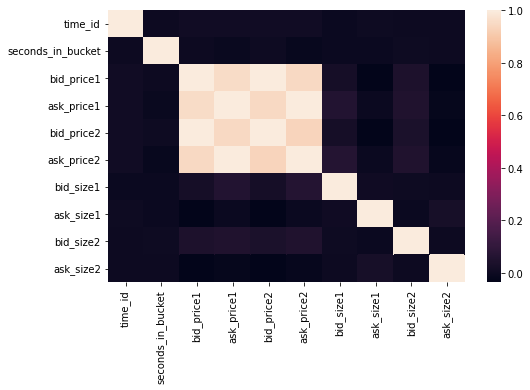

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(book_train.corr())
plt.show()

### time_id

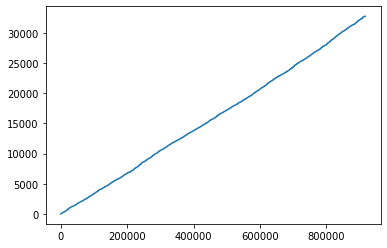

In [12]:
book_train['time_id'].plot()
plt.show()

### bid/ask_price

- 1に標準化されている

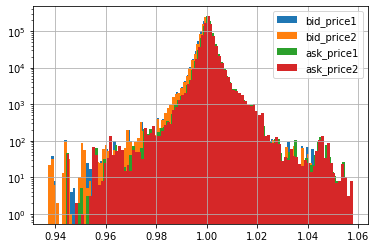

In [13]:
cols = ['bid_price1', 'bid_price2', 'ask_price1', 'ask_price2']
for c in cols:
    book_train[c].hist(bins=100, label=c)

plt.legend(loc='best')
plt.yscale('log')
plt.show()

### bid/ask_size

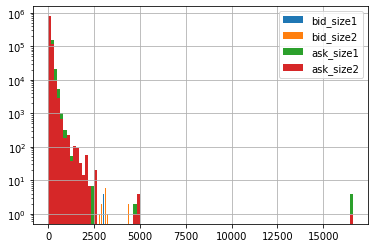

In [14]:
cols = ['bid_size1', 'bid_size2', 'ask_size1', 'ask_size2']
for c in cols:
    book_train[c].hist(bins=100, label=c)

plt.legend(loc='best')
plt.yscale('log')
plt.show()

### 時間変化

- time_idを指定して、その中での price の変化を見る
- stock_id =0 , time_id=5 では、ask>bidの傾向を持つ
- また price1/2 は、bid と ask で定義が違うことに留意
- 実際にどの価格でトレードされたかを破線で示している（trade_trainの時間変化）
    - ask と bid の真ん中に挟まれている

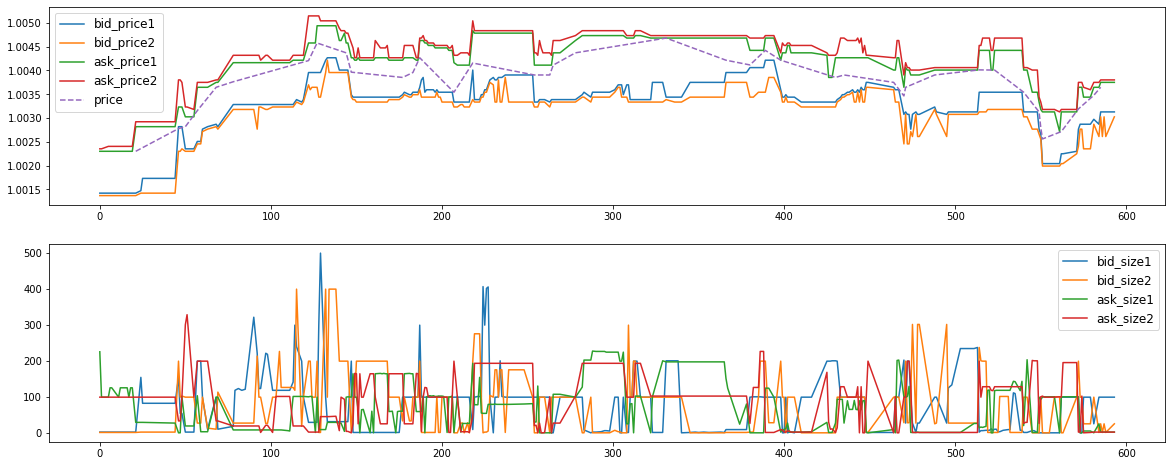

In [15]:
list_price = ['bid_price1', 'bid_price2', 'ask_price1', 'ask_price2']
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
for c in list_price:
    plt.plot(book_train[book_train['time_id']==5]["seconds_in_bucket"], book_train[book_train['time_id']==5][c],label=c)

# -- trade_train
plt.plot(trade_train[trade_train['time_id']==5]["seconds_in_bucket"], trade_train[trade_train['time_id']==5]['price'],label='price', linestyle='--')
plt.legend(fontsize=12)

plt.subplot(2,1,2)
list_size = ['bid_size1', 'bid_size2', 'ask_size1', 'ask_size2']
for c in list_size:
    plt.plot(book_train[book_train['time_id']==5]["seconds_in_bucket"], book_train[book_train['time_id']==5][c],label=c)
plt.legend(fontsize=12)
plt.show()

# trade_train

In [16]:
trade_train.head()

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1


In [17]:
trade_train.corr()

,time_id,seconds_in_bucket,price,size,order_count
time_id,1.000000,0.000995,0.015973,-0.001579,0.000133
seconds_in_bucket,0.000995,1.000000,0.000943,-0.012251,-0.009365
price,0.015973,0.000943,1.000000,-0.000147,-0.001312
size,-0.001579,-0.012251,-0.000147,1.000000,0.773671
order_count,0.000133,-0.009365,-0.001312,0.773671,1.000000


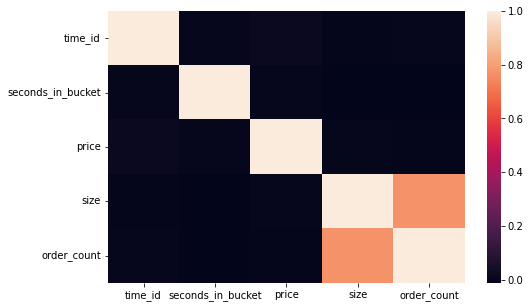

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(trade_train.corr())
plt.show()

# Finantial statistics 

In [6]:
book_train = pd.read_parquet("../input/optiver-realized-volatility-prediction/book_train.parquet/stock_id=0")
trade_train = pd.read_parquet("../input/optiver-realized-volatility-prediction/trade_train.parquet/stock_id=0")

book_train = orvp.add_wap(book_train, level=1)
book_train = orvp.add_wap(book_train, level=2)
book_train = orvp.add_log_return(book_train, level=1)
book_train = orvp.add_log_return(book_train, level=2)

In [7]:
book_train

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,wap1,wap2,log_return1,log_return2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100,1.001434,1.001390,NaN,NaN
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100,1.001448,1.001390,0.000014,0.000000
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100,1.001448,1.001391,0.000000,0.000001
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100,1.001443,1.001391,-0.000005,0.000000
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100,1.001443,1.001391,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28,0.998515,0.998522,0.000434,-0.000162
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28,0.998516,0.998817,0.000001,0.000295
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28,0.998516,0.998715,0.000000,-0.000101
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28,0.998517,0.998715,0.000001,0.000000


## WAP

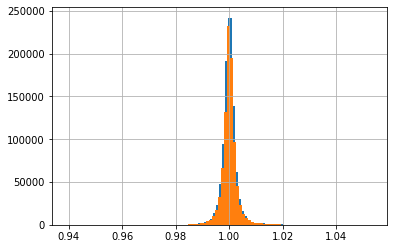

In [9]:
book_train['wap1'].hist(bins=100, label='wap1')
book_train['wap2'].hist(bins=100, label='wap2')

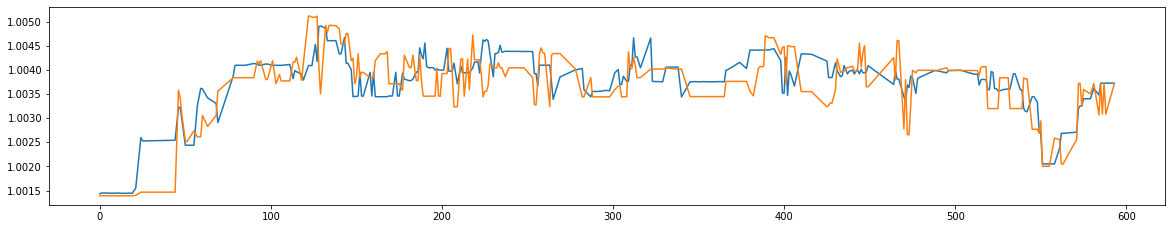

In [11]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
for c in ['wap1', 'wap2']:
    plt.plot(book_train[book_train['time_id']==5]["seconds_in_bucket"], book_train[book_train['time_id']==5][c],label=c)

## log return

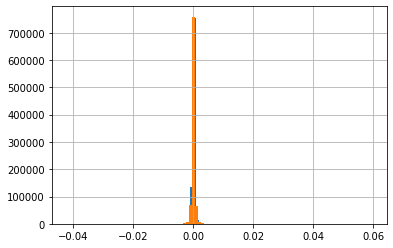

In [13]:
book_train['log_return1'].hist(bins=100, label='log_return1')
book_train['log_return2'].hist(bins=100, label='log_return2')

## realized volatility

定義は log_return の 二乗和なので、ある time_id に対してひとつの値を持っているのみ。

$$
\sigma = \sqrt{\sum_{t} r^2}
$$

In [10]:
orvp.calc_realized_volatility(book_train[book_train['time_id']==5]['log_return1'])

0.004499364172786559

In [11]:
orvp.calc_realized_volatility(book_train[book_train['time_id']==5]['log_return2'])

0.006998503700922707

In [20]:
book_train.groupby('time_id')['log_return1'].agg(orvp.calc_realized_volatility)

time_id
5        0.004499
11       0.003966
16       0.002451
31       0.003742
62       0.003210
           ...   
32751    0.002660
32753    0.004234
32758    0.003368
32763    0.003280
32767    0.002798
Name: log_return1, Length: 3830, dtype: float64

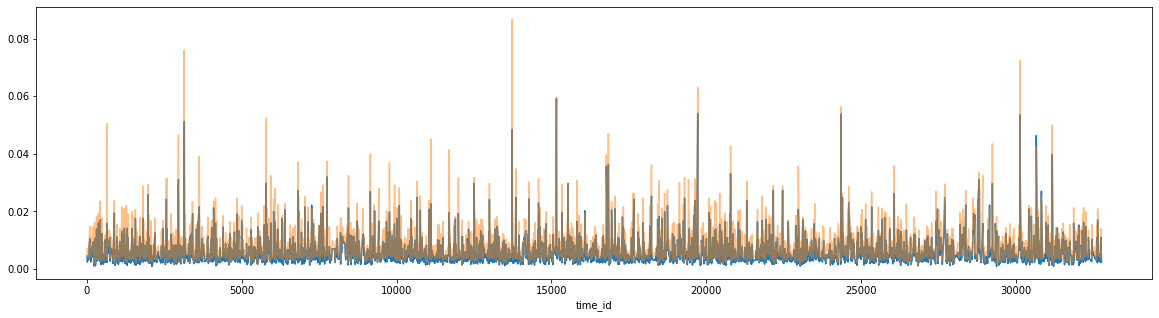

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
book_train.groupby('time_id')['log_return1'].agg(orvp.calc_realized_volatility).plot(ax=ax)
book_train.groupby('time_id')['log_return2'].agg(orvp.calc_realized_volatility).plot(ax=ax, alpha=0.5)
plt.show()